# Spam Classification using Naive Bayes in ML

In [1]:
import flask
print(flask.__version__)

3.0.3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13040\3294412508.py:2: DeprecationWarning: The '__version__' attribute is deprecated and will be removed in Flask 3.1. Use feature detection or 'importlib.metadata.version("flask")' instead.
  print(flask.__version__)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import pickle  
import joblib
print("All necessary library are imported !")


All necessary library are imported !


In [3]:
# Initializing empty lists to store the labels and messages
x, y = [],[]

# Opening and reading the file
with open('Data/SMSSpamCollection.txt','r') as file:
    data = file.read()  # Reading the entire content of the file
    for data_item in data.split("\n"):  # Splitting the content into lines
        if len(data_item.split('\t')) == 2:  # Checking if the line contains exactly two parts
            y.append(data_item.split('\t')[0])  # Appending the label to y
            x.append(data_item.split('\t')[1])  # Appending the message to x

# Print confirmation message
print('Successfully read the data from text file and splitted into x and y')


Successfully read the data from text file and splitted into x and y


In [4]:
## here we check the length of x and y
len(x),len(y)

(5574, 5574)

In [5]:
data_dict ={'mail_message':x,'label':y}
df = pd.DataFrame(data_dict)
df.head()

,mail_message,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   mail_message  5574 non-null   object
 1   label         5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.isnull().sum()

mail_message    0
label           0
dtype: int64

In [8]:
for i in range(0,len(df)):
    message = re.sub('[^a-zA-Z]',' ',df['mail_message'][i])
    message = message.lower()
    df['mail_message'][i] = message
df.head(10)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13040\1389373870.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['mail_message'][i] = message


,mail_message,label
0,go until jurong point crazy available only ...,ham
1,ok lar joking wif u oni,ham
2,free entry in a wkly comp to win fa cup fina...,spam
3,u dun say so early hor u c already then say,ham
4,nah i don t think he goes to usf he lives aro...,ham
5,freemsg hey there darling it s been week s n...,spam
6,even my brother is not like to speak with me ...,ham
7,as per your request melle melle oru minnamin...,ham
8,winner as a valued network customer you have...,spam
9,had your mobile months or more u r entitle...,spam


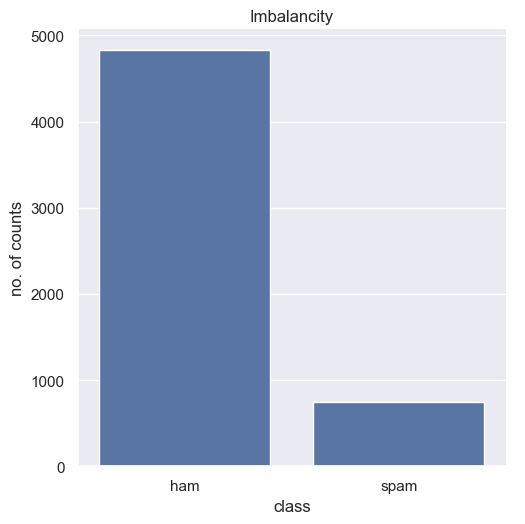

In [9]:
classs = list(df['label'].value_counts().index)
valu = list(df['label'].value_counts().values)
sns.set(rc = {'figure.figsize':(8,20)})
sns.catplot(x = classs,y = valu,kind = 'bar')
plt.title('Imbalancity')
plt.xlabel('class')
plt.ylabel('no. of counts')
plt.show()

In [10]:
df['label'].value_counts()

label
ham     4827
spam     747
Name: count, dtype: int64

In [11]:
df.sample(2000)

,mail_message,label
905,we re all getting worried over here derek and...,ham
2018,better than bb if he wont use it his wife wi...,ham
2539,the monthly amount is not that terrible and yo...,ham
2213,this is one of the days you have a billion cla...,ham
5335,neither in sterm voice i m studying all f...,ham
...,...,...
4567,should i buy him a blackberry bold or torch ...,ham
449,lol have you made plans for new years,ham
3396,then i buy,ham
1415,so wats ur opinion abt him and how abt is char...,ham


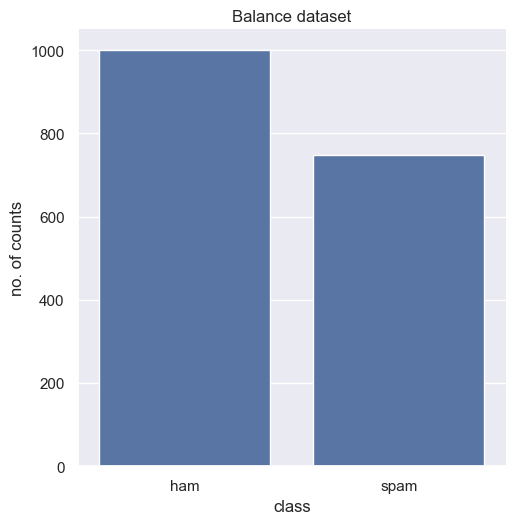

In [12]:
# filtering th dataset
ham = df[df['label']=='ham'].sample(1000)
spam = df[df['label']=='spam']

# concating the dataset
balance_df = pd.concat([ham,spam])

## visulizinng the dataset
classs = list(balance_df['label'].value_counts().index)
valu = list(balance_df['label'].value_counts().values)
sns.set(rc = {'figure.figsize':(8,20)})
sns.catplot(x = classs,y = valu,kind = 'bar')
plt.title('Balance dataset')
plt.xlabel('class')
plt.ylabel('no. of counts')
plt.show()

In [13]:
balance_df['label'] = balance_df['label'].map({'ham':0,'spam':1})
balance_df.head()

,mail_message,label
4755,ok lor or u wan me go look u,0
1709,how s my loverboy doing what does he do that...,0
3159,thank u it better work out cause i will feel ...,0
24,ffffffffff alright no way i can meet up with ...,0
1357,u ned to convince him tht its not possible wit...,0


In [14]:
balance_df.isnull().sum()

mail_message    0
label           0
dtype: int64

In [15]:
print('duplicated values are : ',balance_df.duplicated().sum())

duplicated values are :  137


In [16]:
print('shape is: ' ,balance_df.shape)

shape is:  (1747, 2)


In [17]:
balance_df.drop_duplicates(inplace=True)

In [18]:
balance_df.duplicated().sum()

0

In [19]:
balance_df.shape

(1610, 2)

In [20]:
## divide data into x and y
x = balance_df['mail_message']
y = balance_df['label']

In [21]:
x.head()

4755                   ok lor    or u wan me go look   u 
1709    how s my loverboy doing   what does he do that...
3159    thank u  it better work out cause i will feel ...
24      ffffffffff  alright no way i can meet up with ...
1357    u ned to convince him tht its not possible wit...
Name: mail_message, dtype: object

In [22]:
y.head()

4755    0
1709    0
3159    0
24      0
1357    0
Name: label, dtype: int64

In [23]:
## prepare single list of a mail
x = x.values
x[0:5]

array(['ok lor    or u wan me go look   u ',
       'how s my loverboy doing   what does he do that keeps him from coming to his queen  hmmm   doesn t he ache to speak to me   miss me desparately  ',
       'thank u  it better work out cause i will feel used otherwise',
       'ffffffffff  alright no way i can meet up with you sooner ',
       'u ned to convince him tht its not possible witot hurting his feeling its the main'],
      dtype=object)

In [24]:
x.shape

(1610,)

In [25]:
## initializing the bag of word class class
BOW_obj = CountVectorizer(max_features=2000,stop_words='english')

In [27]:
x.shape,type(x)

((1610,), numpy.ndarray)

In [28]:
x_transformed = BOW_obj.fit_transform(x)

In [29]:
x_transformed

<1610x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 12593 stored elements in Compressed Sparse Row format>

In [30]:
dense_matrix  = x_transformed.toarray()
dense_matrix.shape

(1610, 2000)

In [31]:
joblib.dump(BOW_obj,'vectorizer.lb')

['vectorizer.lb']

In [32]:
x = dense_matrix
x.shape,        y.shape

((1610, 2000), (1610,))

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

## MultinomialNB

In [34]:
mnb = MultinomialNB()

In [35]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [39]:
mnb.score(x_train,y_train)

0.9743788819875776

In [37]:
mnb.score(x_test,y_test)


0.9440993788819876

## Prediction

In [40]:
pred = mnb.predict(x_test)

In [41]:
confusion_matrix(y_test,pred)

array([[192,  11],
       [  7, 112]], dtype=int64)

<Axes: >

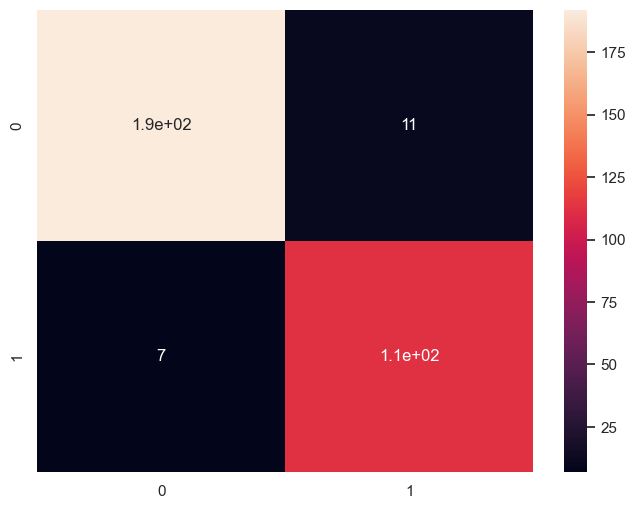

In [42]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [43]:
print(classification_report(y_test,pred))
#classification report for mode evalution

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       203
           1       0.91      0.94      0.93       119

    accuracy                           0.94       322
   macro avg       0.94      0.94      0.94       322
weighted avg       0.94      0.94      0.94       322



In [45]:
pickle.dump(BOW_obj,open('vectorizer.pkl','wb'))

In [46]:
pickle.dump(mnb,open('spamclassifier_mnb.pkl','wb'))            ## to save the model

In [47]:
model = pickle.load(open('spamclassifier_mnb.pkl','rb'))        ## to load the model

In [49]:
compare_dict = {'actual':y_test,'pred':pred}
comparison_df = pd.DataFrame(compare_dict)
comparison_df.head(10)

,actual,pred
3976,0,0
1072,1,1
4823,1,1
5184,0,0
4112,1,1
2818,1,1
2455,0,0
4232,0,0
3387,0,0
844,1,1
